![Credit card being held in hand](credit_card.jpg)

Commercial banks receive _a lot_ of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this workbook, you will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

### The Data

The data is a small subset of the Credit Card Approval dataset from the UCI Machine Learning Repository showing the credit card applications a bank receives. This dataset has been loaded as a `pandas` DataFrame called `cc_apps`. The last column in the dataset is the target value.

In [113]:
oldshape = df.shape
df.drop_duplicates()
newshape = df.shape
has_duplicates = 'No' if oldshape == newshape else oldshape[0] - newshape[0]



print(f'The dataset originally has {oldshape} shape, and now dropping the duplicates the dataset has {newshape} shape so the dataset have {has_duplicates} duplicates')

The dataset originally has (690, 14) shape, and now dropping the duplicates the dataset has (690, 14) shape so the dataset have No duplicates


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    int64  
 13  13      690 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 75.6+ KB


In [115]:
for i in df.columns:
    df[i] = df[i].replace('?', np.nan)

char

,0,3,4,5,6,8,9,11
0,b,u,g,w,v,t,t,g
1,a,u,g,q,h,t,t,g
2,a,u,g,q,h,t,f,g
3,b,u,g,w,v,t,t,g
4,b,u,g,w,v,t,f,s
...,...,...,...,...,...,...,...,...
685,b,y,p,e,h,f,f,g
686,a,u,g,c,v,f,t,g
687,a,y,p,ff,ff,f,t,g
688,b,u,g,aa,v,f,f,g


In [116]:
nulls = 0 if sum(df.isnull().sum()) == 0 else sum(df.isnull().sum())

print(f'The dataset have {nulls} nulls')


The dataset have 54 nulls


In [117]:
df.isnull().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13     0
dtype: int64

In [118]:
#replacing null values
df.iloc[:, 1] = df.iloc[:, 1].fillna(df.iloc[:, 1].astype(float).mean()).astype(float)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,-


In [119]:
df.describe()

,1,2,7,10,12
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.853273,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [120]:
df.describe(include='object')

,0,3,4,5,6,8,9,11,13
count,678,684,684,681,681,690,690,690,690
unique,2,3,3,14,9,2,2,3,2
top,b,u,g,c,v,t,f,g,-
freq,468,519,519,137,399,361,395,625,383


Normalization

In [121]:
numeric = df.select_dtypes(include=['float64', 'int64'])
numeric

,1,2,7,10,12
0,30.83,0.000,1.25,1,0
1,58.67,4.460,3.04,6,560
2,24.50,0.500,1.50,0,824
3,27.83,1.540,3.75,5,3
4,20.17,5.625,1.71,0,0
...,...,...,...,...,...
685,21.08,10.085,1.25,0,0
686,22.67,0.750,2.00,2,394
687,25.25,13.500,2.00,1,1
688,17.92,0.205,0.04,0,750


In [122]:
char = df.select_dtypes(include=['object']).drop(columns=13)
char

,0,3,4,5,6,8,9,11
0,b,u,g,w,v,t,t,g
1,a,u,g,q,h,t,t,g
2,a,u,g,q,h,t,f,g
3,b,u,g,w,v,t,t,g
4,b,u,g,w,v,t,f,s
...,...,...,...,...,...,...,...,...
685,b,y,p,e,h,f,f,g
686,a,u,g,c,v,f,t,g
687,a,y,p,ff,ff,f,t,g
688,b,u,g,aa,v,f,f,g


In [123]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
char_im = imputer.fit_transform(char)
char_im = pd.DataFrame(char_im)
char_im.columns = [0, 3, 4, 5, 6, 8, 9, 11]
char_im

,0,3,4,5,6,8,9,11
0,b,u,g,w,v,t,t,g
1,a,u,g,q,h,t,t,g
2,a,u,g,q,h,t,f,g
3,b,u,g,w,v,t,t,g
4,b,u,g,w,v,t,f,s
...,...,...,...,...,...,...,...,...
685,b,y,p,e,h,f,f,g
686,a,u,g,c,v,f,t,g
687,a,y,p,ff,ff,f,t,g
688,b,u,g,aa,v,f,f,g


In [124]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numeric_st = scaler.fit_transform(numeric)
numeric_st = pd.DataFrame(numeric_st)
numeric_st.columns = ['1','2','7','10','12']
numeric_st

,1,2,7,10,12
0,0.146633,-0.443012,0.101626,0.333333,-0.012642
1,1.998005,0.275473,0.829268,2.000000,1.403287
2,-0.274314,-0.362465,0.203252,0.000000,2.070796
3,-0.052868,-0.194925,1.117886,1.666667,-0.005057
4,-0.562261,0.463149,0.288618,0.000000,-0.012642
...,...,...,...,...,...
685,-0.501746,1.181635,0.101626,0.000000,-0.012642
686,-0.396010,-0.322191,0.406504,0.666667,0.983565
687,-0.224439,1.731776,0.406504,0.333333,-0.010114
688,-0.711887,-0.409988,-0.390244,0.000000,1.883692


In [125]:
numeric_st.describe()

,1,2,7,10,12
count,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.195722,0.323596,0.497319,0.800000,2.559761
std,0.788248,0.801959,1.360371,1.620980,13.173458
min,-0.989194,-0.443012,-0.406504,0.000000,-0.012642
25%,-0.396010,-0.281917,-0.339431,0.000000,-0.012642
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.603990,0.718083,0.660569,1.000000,0.987358
max,3.433084,4.067660,11.178862,22.333333,252.831858


In [126]:
char_pre = pd.get_dummies(char_im, drop_first=True)
char_pre

,0_b,3_u,3_y,4_gg,4_p,5_c,5_cc,5_d,5_e,5_ff,5_i,5_j,5_k,5_m,5_q,5_r,5_w,5_x,6_dd,6_ff,6_h,6_j,6_n,6_o,6_v,6_z,8_t,9_t,11_p,11_s
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
686,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
687,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
688,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [127]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
enco = LabelEncoder()
X = char_pre.join(numeric_st)
y = enco.fit_transform(df[13])


X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.28, stratify=y, random_state=10)

In [128]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# Load the dataset
df = pd.read_csv("cc_approvals.data", header=None) 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


In [129]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        86
           1       0.89      0.83      0.86       108

    accuracy                           0.85       194
   macro avg       0.85      0.85      0.85       194
weighted avg       0.85      0.85      0.85       194



<AxesSubplot: title={'center': 'confusion_matrix'}>

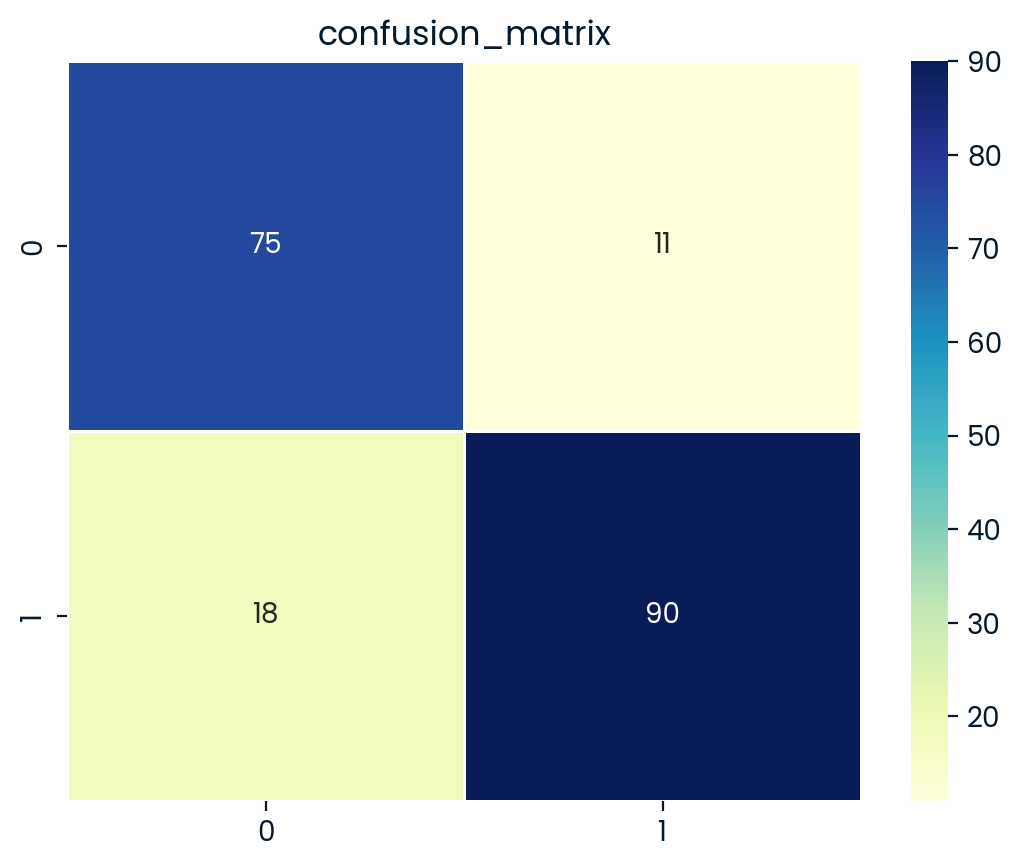

In [130]:
plt.title('confusion_matrix')
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)

In [131]:
from sklearn.model_selection import GridSearchCV, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=30)
params = {'penalty':['l1', 'l2'], 
          'solver': ['liblinear'], 
          'C': [0.001, 0.01, 0.1]}

lreg = LogisticRegression()
logreg_cv = GridSearchCV(lreg, params, cv = kf)
logreg_cv.fit(X_train, y_train)
print(logreg_cv.best_params_, logreg_cv.best_score_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'} 0.8588080808080807


In [133]:
best_estimator = logreg_cv.best_estimator_
best_estimator.fit(X_train, y_train)
best_score = best_estimator.score(X_test, y_test)
best_score

0.8350515463917526

In [136]:
y_predcv = best_estimator.predict(X_test)
cm = confusion_matrix(y_test, y_predcv)
print(classification_report(y_test, y_predcv))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        86
           1       0.95      0.74      0.83       108

    accuracy                           0.84       194
   macro avg       0.85      0.85      0.84       194
weighted avg       0.86      0.84      0.83       194



<AxesSubplot: title={'center': 'confusion_matrix'}>

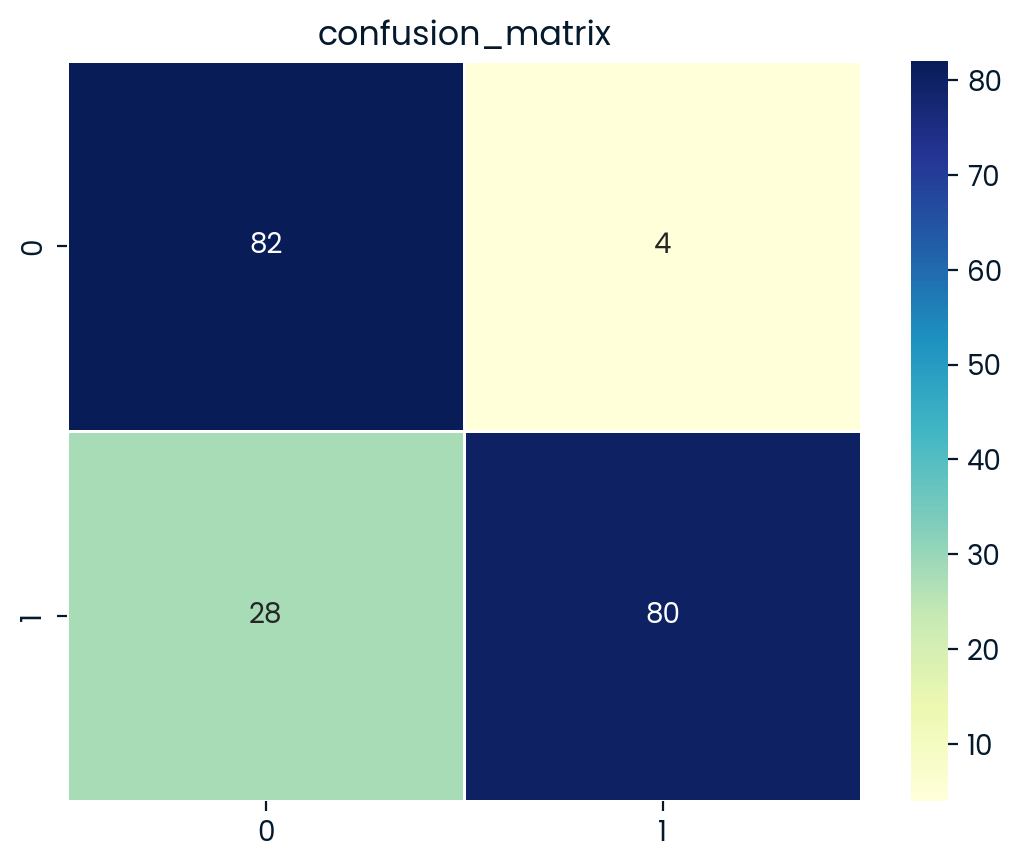

In [135]:
plt.title('confusion_matrix')
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)